<center>
  <p><b><i>Decision Tree Classifier for Customer Subscription Prediction</i></b></p>
  <p>Prepared by Abir LASSOUED</p>
</center>



<center><p align="center">
  <img src="https://www.pw.live/exams/wp-content/uploads/2024/06/Bank-Marketing.jpg"
alt="Titanic Dataset" width="800"/>
</p></center>

# Dataset Overview

**Data Description :**  <br>
This dataset contains information on customer demographics and behavior, used to predict whether a client will subscribe to a term deposit.


**Features :**  <br>
* **age**: the age of the client.<br>
* **job**: type of job the client has (e.g., admin, technician, services, management, etc.).<br>
* **marital**: marital status of the client (e.g., married, single, divorced).
* **education**: level of education of the client (e.g., primary, secondary, tertiary).<br>
* **default**: whether the client has credit in default (yes/no).<br>
* **balance**: average yearly balance in euros of the client.<br>
* **housing**: whether the client has a housing loan (yes/no).<br>
* **loan**: whether the client has a personal loan (yes/no).<br>
* **contact**: type of communication used to contact the client (e.g., cellular, telephone).<br>
* **day**: last contact day of the month (1-31).<br>
* **month**: last contact month of the year (e.g., January, February, etc.).<br>
* **duration**: duration of the last contact in seconds. This feature is crucial as it strongly correlates with the target variable.<br>
* **campaign**: number of contacts performed during this campaign.<br>
* **pdays**: number of days since the client was last contacted from a previous campaign (999 means the client was not previously contacted).<br>
* **previous**: number of contacts performed before this campaign.<br>
* **poutcome**: outcome of the previous marketing campaign (e.g., success, failure).<br>
* **y**: whether the client subscribed to a term deposit (yes/no). This is the target variable for prediction.<br> <br>


**Dataset URL :**  <br>
https://archive.ics.uci.edu/ml/datasets/bank+marketing





# Imports & Reading Data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import pandas.plotting as pd_plotting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [2]:
# Load the CSV file 'bank.csv'
df = pd.read_csv('/content/bank.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


# Data Understanding

In [3]:
# Data type
type(df)

pandas.core.frame.DataFrame

In [4]:
# Data size
df.shape

(4521, 17)

In [5]:
# Data types of each column
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [6]:
# Count the number of occurrences of elements in df
df.count()

,0
age,4521
job,4521
marital,4521
education,4521
default,4521
balance,4521
housing,4521
loan,4521
contact,4521
day,4521


In [7]:
# More information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [8]:
# List columns
df.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

# Exploratory Data Analysis (EDA)

In [9]:
# Count of missing values in each column
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


**Insight:** <br>


*   No missing values detected




In [10]:
# Count of duplicate rows in the DataFrame
df.duplicated().sum()

0

**Insight :**


*   No duplicates detected.



In [11]:
# Print unique values number for each numerical variable
for col in df:
    print(f"Unique values number in '{col}':")
    print(df[col].nunique())
    print("-" * 40)

Unique values number in 'age':
67
----------------------------------------
Unique values number in 'job':
12
----------------------------------------
Unique values number in 'marital':
3
----------------------------------------
Unique values number in 'education':
4
----------------------------------------
Unique values number in 'default':
2
----------------------------------------
Unique values number in 'balance':
2353
----------------------------------------
Unique values number in 'housing':
2
----------------------------------------
Unique values number in 'loan':
2
----------------------------------------
Unique values number in 'contact':
3
----------------------------------------
Unique values number in 'day':
31
----------------------------------------
Unique values number in 'month':
12
----------------------------------------
Unique values number in 'duration':
875
----------------------------------------
Unique values number in 'campaign':
32
------------------------------

**Insight:**


*   All columns contain more than one unique value.




**1- Categorical Features**

In [12]:
# Identify categorical columns in the DataFrame
categorical_vars = df.select_dtypes(include=['object', 'category']).columns.drop('y')
print(categorical_vars.tolist())

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [13]:
# Print unique values for each categorical variable
for col in categorical_vars:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 40)

Unique values in 'job':
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
----------------------------------------
Unique values in 'marital':
['married' 'single' 'divorced']
----------------------------------------
Unique values in 'education':
['primary' 'secondary' 'tertiary' 'unknown']
----------------------------------------
Unique values in 'default':
['no' 'yes']
----------------------------------------
Unique values in 'housing':
['no' 'yes']
----------------------------------------
Unique values in 'loan':
['no' 'yes']
----------------------------------------
Unique values in 'contact':
['cellular' 'unknown' 'telephone']
----------------------------------------
Unique values in 'month':
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
----------------------------------------
Unique values in 'poutcome':
['unknown' 'failure' 'other' 'success']
-----------

In [14]:
# Descriptive statistics for categorical variables
df[categorical_vars].describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome
count,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4
top,management,married,secondary,no,yes,no,cellular,may,unknown
freq,969,2797,2306,4445,2559,3830,2896,1398,3705


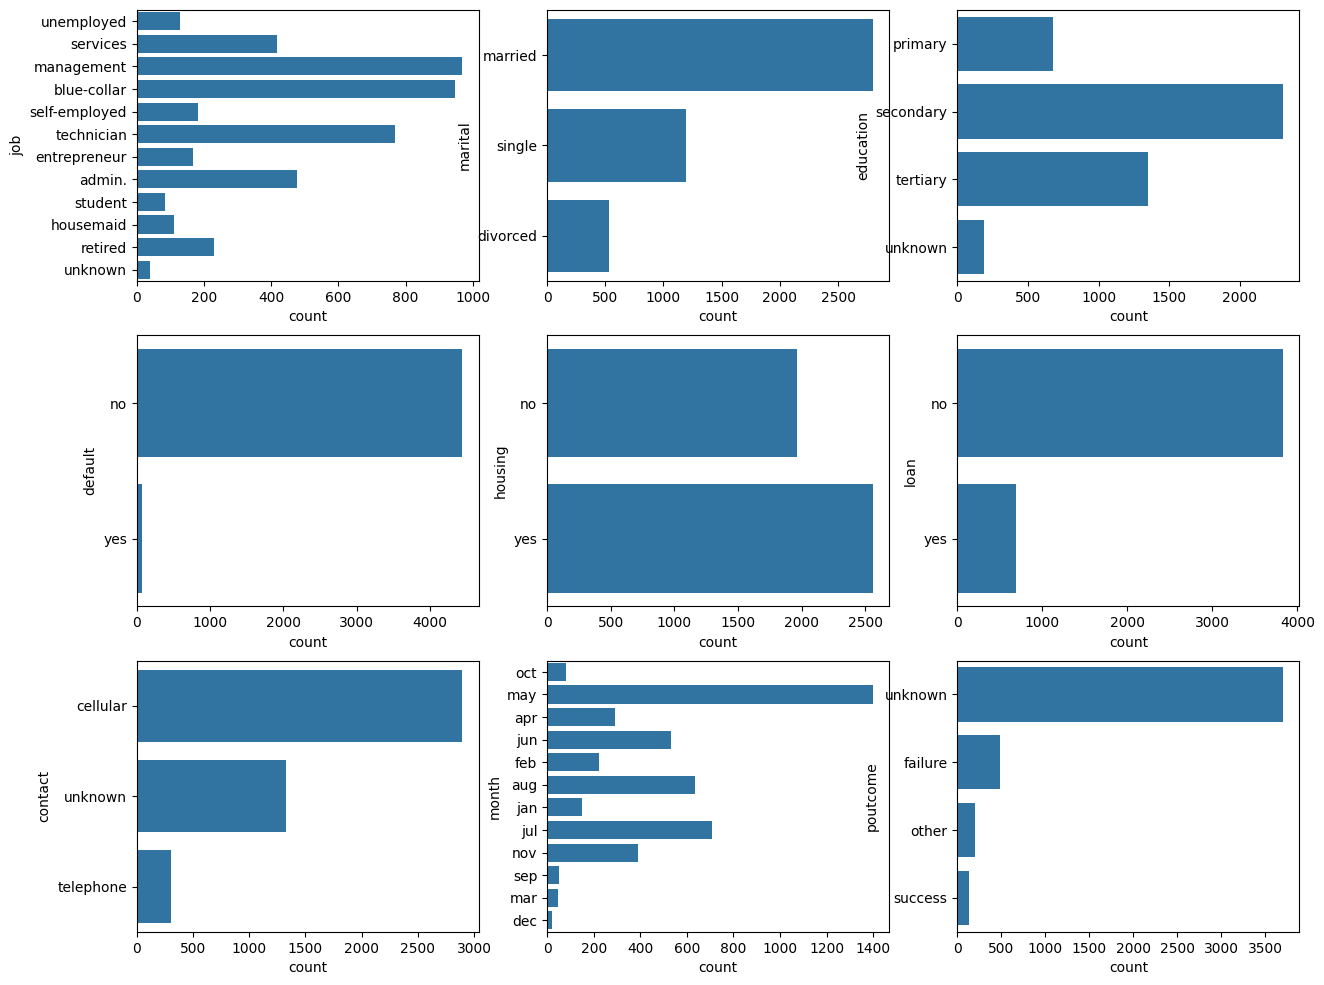

In [15]:
# Visualize the distribution of each categorical variable using count plots
plt.figure(figsize=(15, 50), facecolor='white')
plot =1
for col in categorical_vars:
    ax = plt.subplot(12,3,plot)
    sns.countplot(y=col,data=df)
    plt.ylabel(col)
    plot+=1
plt.show()

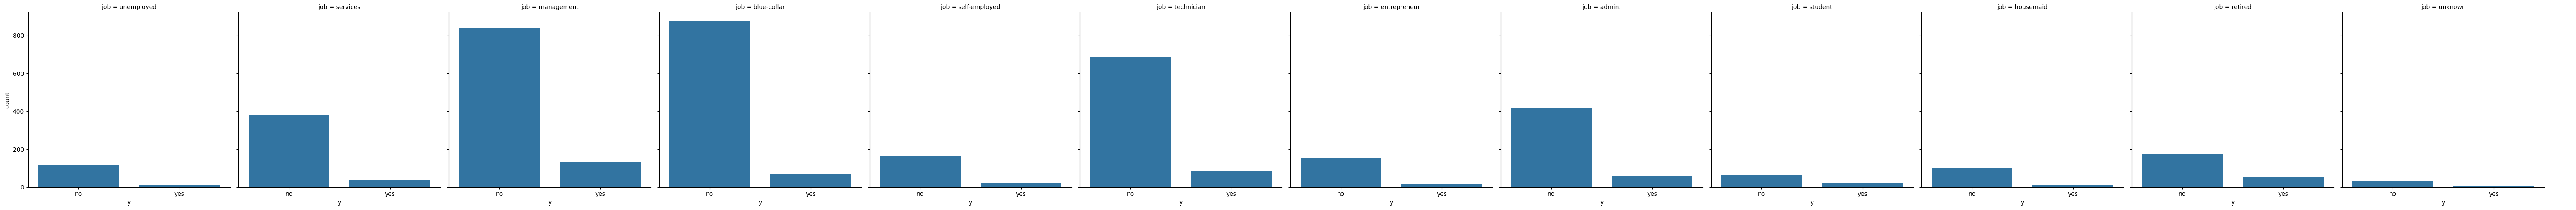

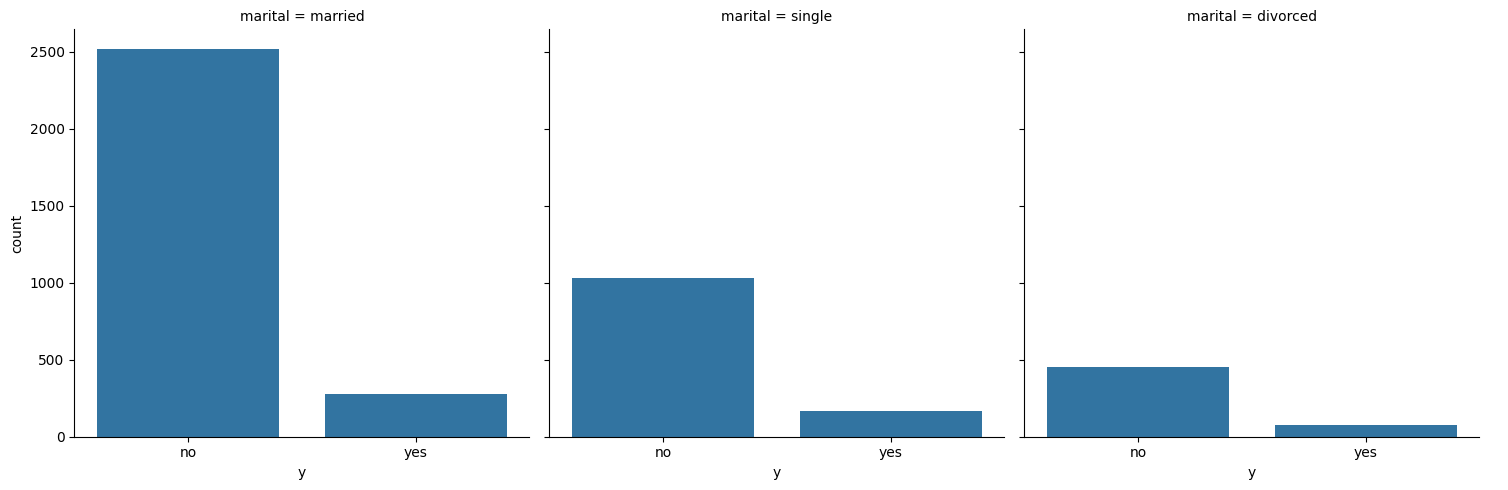

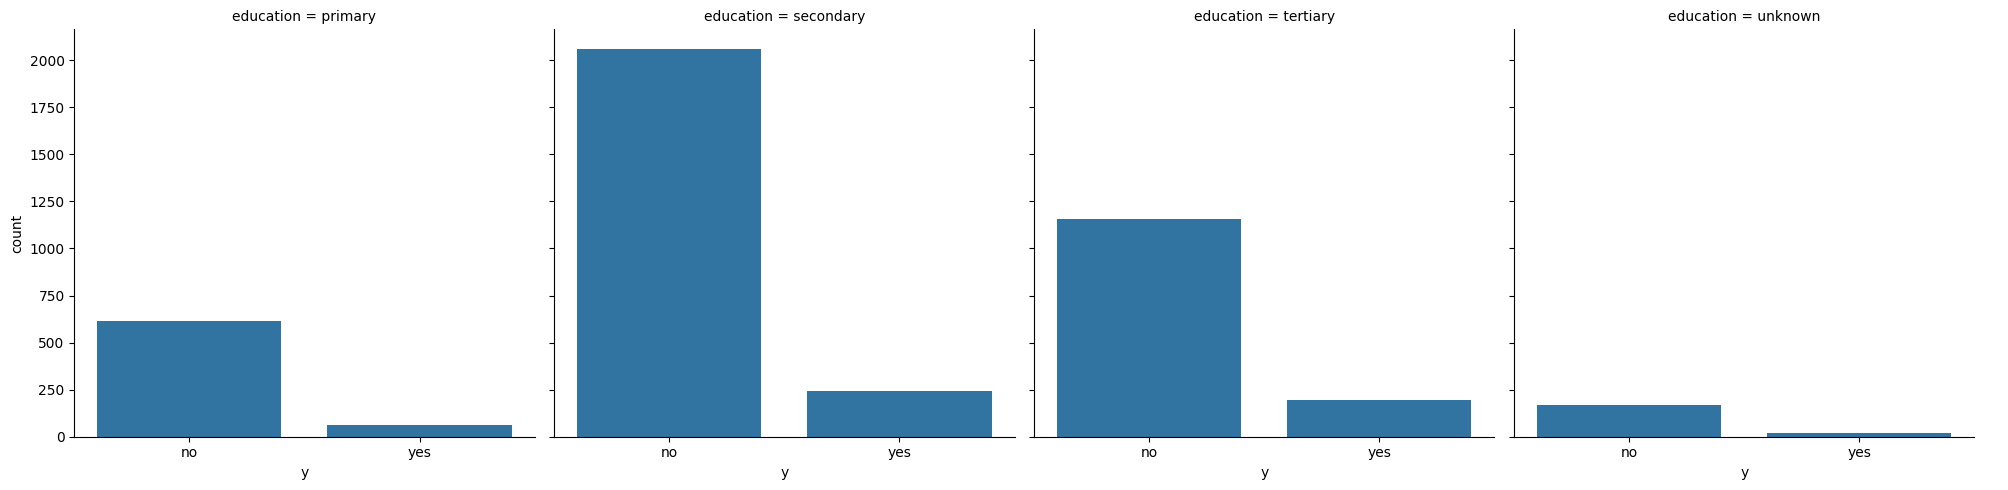

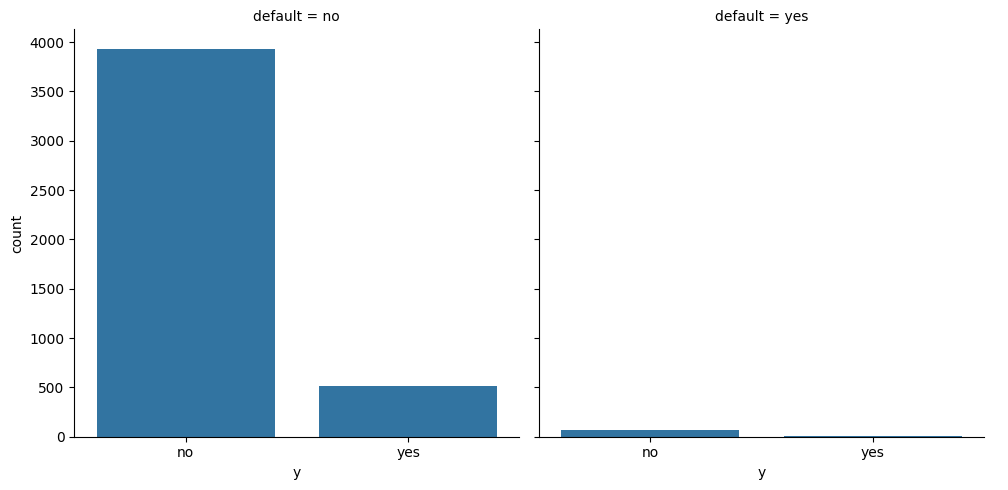

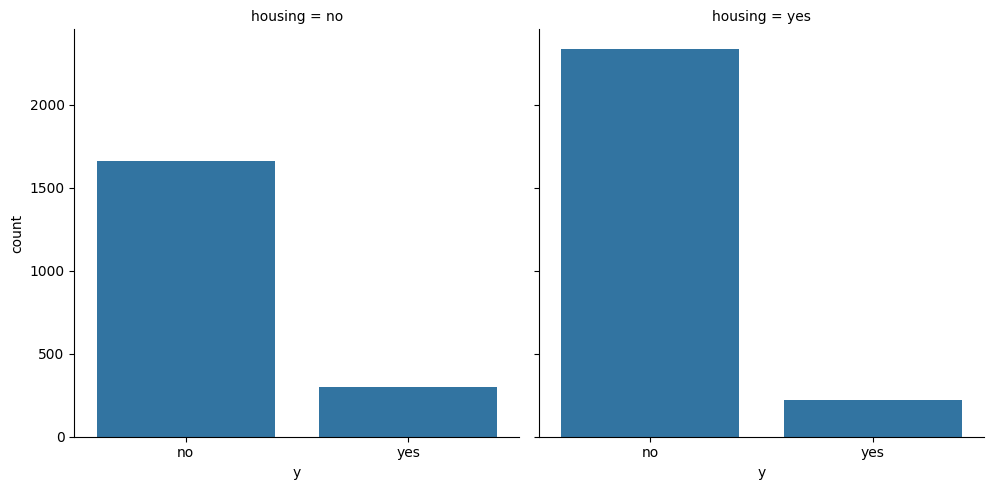

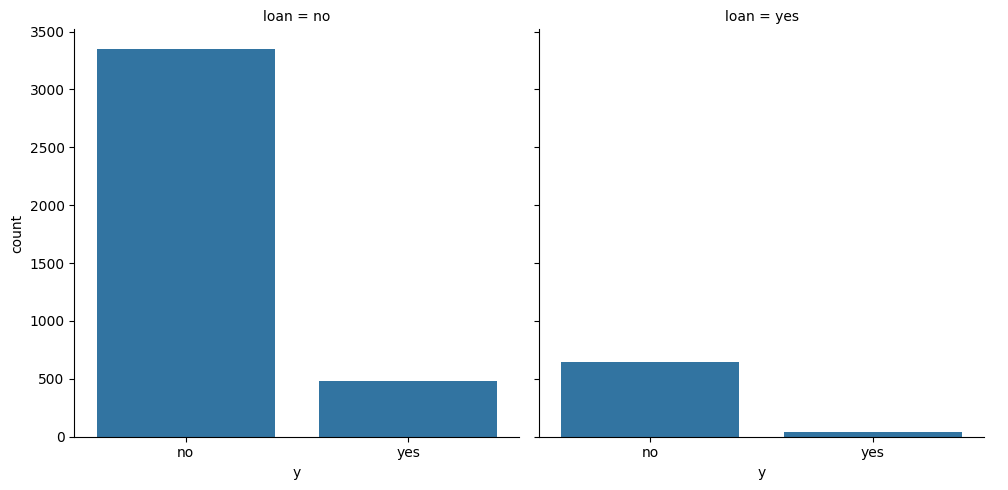

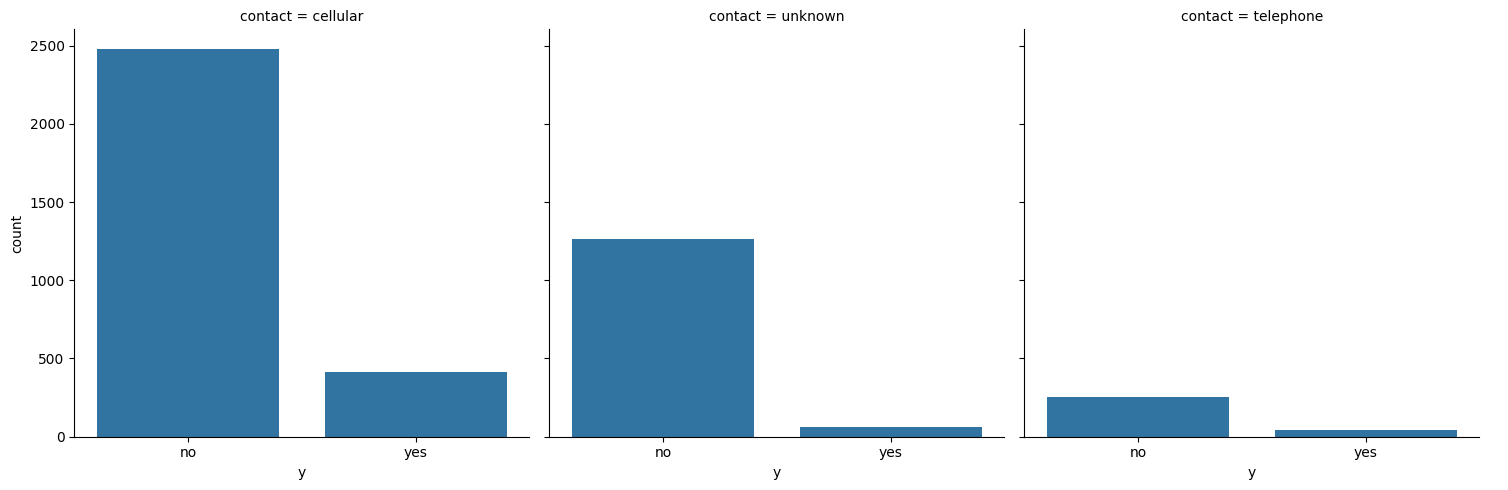

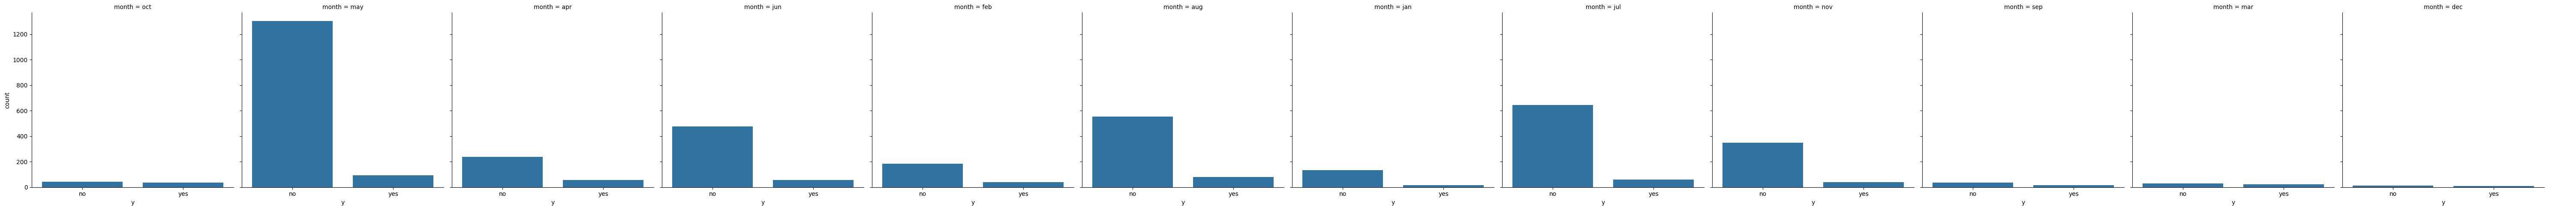

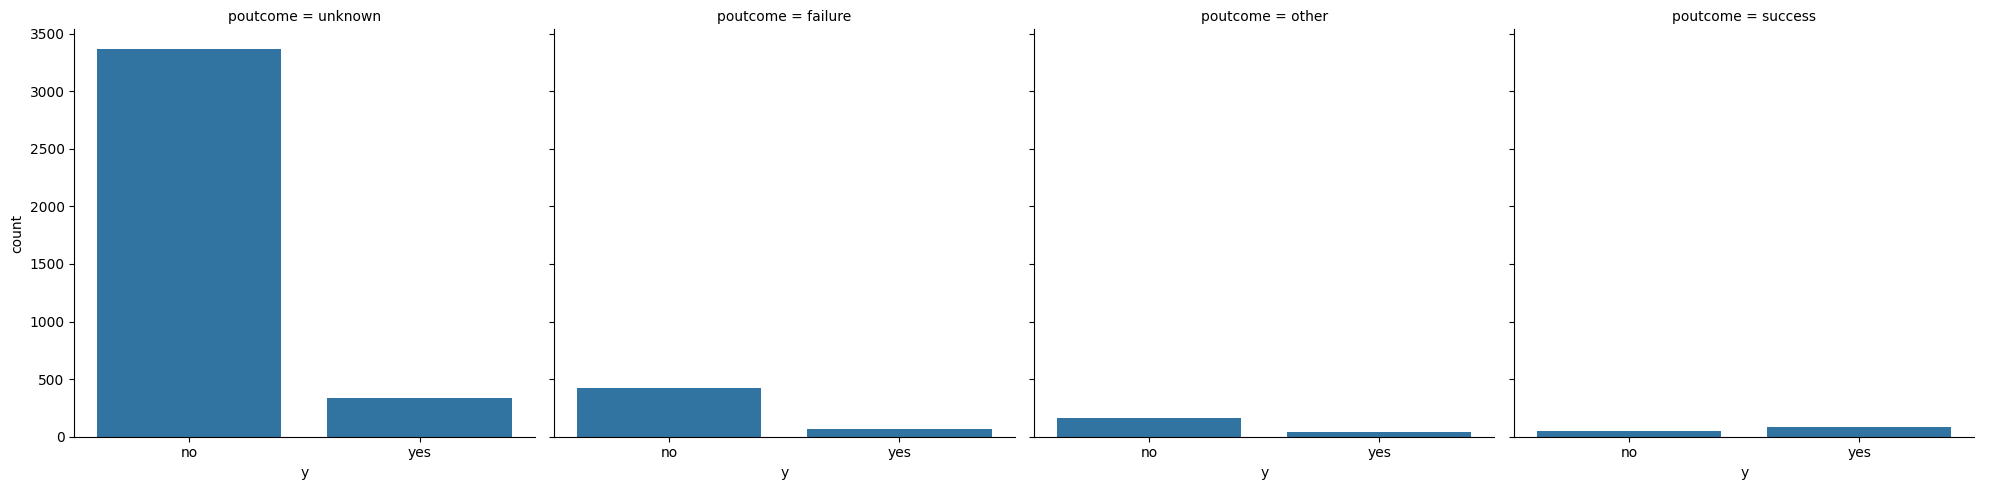

In [16]:
# Visualize the relationship between the target variable 'y' and each categorical variable
for col in categorical_vars:
    sns.catplot(x='y', col=col, kind='count', data= df)
plt.show()

In [17]:
# Display count of each categorical variable grouped by the target variable 'y'
for col in categorical_vars:
    print(df.groupby(['y',col]).size())

y    job          
no   admin.           420
     blue-collar      877
     entrepreneur     153
     housemaid         98
     management       838
     retired          176
     self-employed    163
     services         379
     student           65
     technician       685
     unemployed       115
     unknown           31
yes  admin.            58
     blue-collar       69
     entrepreneur      15
     housemaid         14
     management       131
     retired           54
     self-employed     20
     services          38
     student           19
     technician        83
     unemployed        13
     unknown            7
dtype: int64
y    marital 
no   divorced     451
     married     2520
     single      1029
yes  divorced      77
     married      277
     single       167
dtype: int64
y    education
no   primary       614
     secondary    2061
     tertiary     1157
     unknown       168
yes  primary        64
     secondary     245
     tertiary      193
     unkn

**2- Numerical Features**

In [18]:
# Identify numerical columns in the DataFrame
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_vars.tolist())

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [19]:
# Display count of each numerical variable grouped by the target variable 'y'
for col in numerical_vars:
    print(df.groupby(['y',col]).size())

y    age
no   19      2
     20      2
     21      6
     22      6
     23     18
            ..
yes  79      2
     80      2
     83      2
     84      1
     87      1
Length: 127, dtype: int64
y    balance
no   -3313      1
     -2082      1
     -1746      1
     -1680      1
     -1400      1
               ..
yes   11262     1
      12569     1
      14220     1
      19317     1
      26965     1
Length: 2604, dtype: int64
y    day
no   1       17
     2      100
     3       93
     4      125
     5      153
           ... 
yes  27      16
     28      17
     29      10
     30      27
     31       4
Length: 62, dtype: int64
y    duration
no   4           1
     5           9
     6           2
     7           6
     8           9
                ..
yes  1971        1
     2029        1
     2087        1
     2456        1
     2769        1
Length: 1149, dtype: int64
y    campaign
no   1           1494
     2           1126
     3            501
     4            282


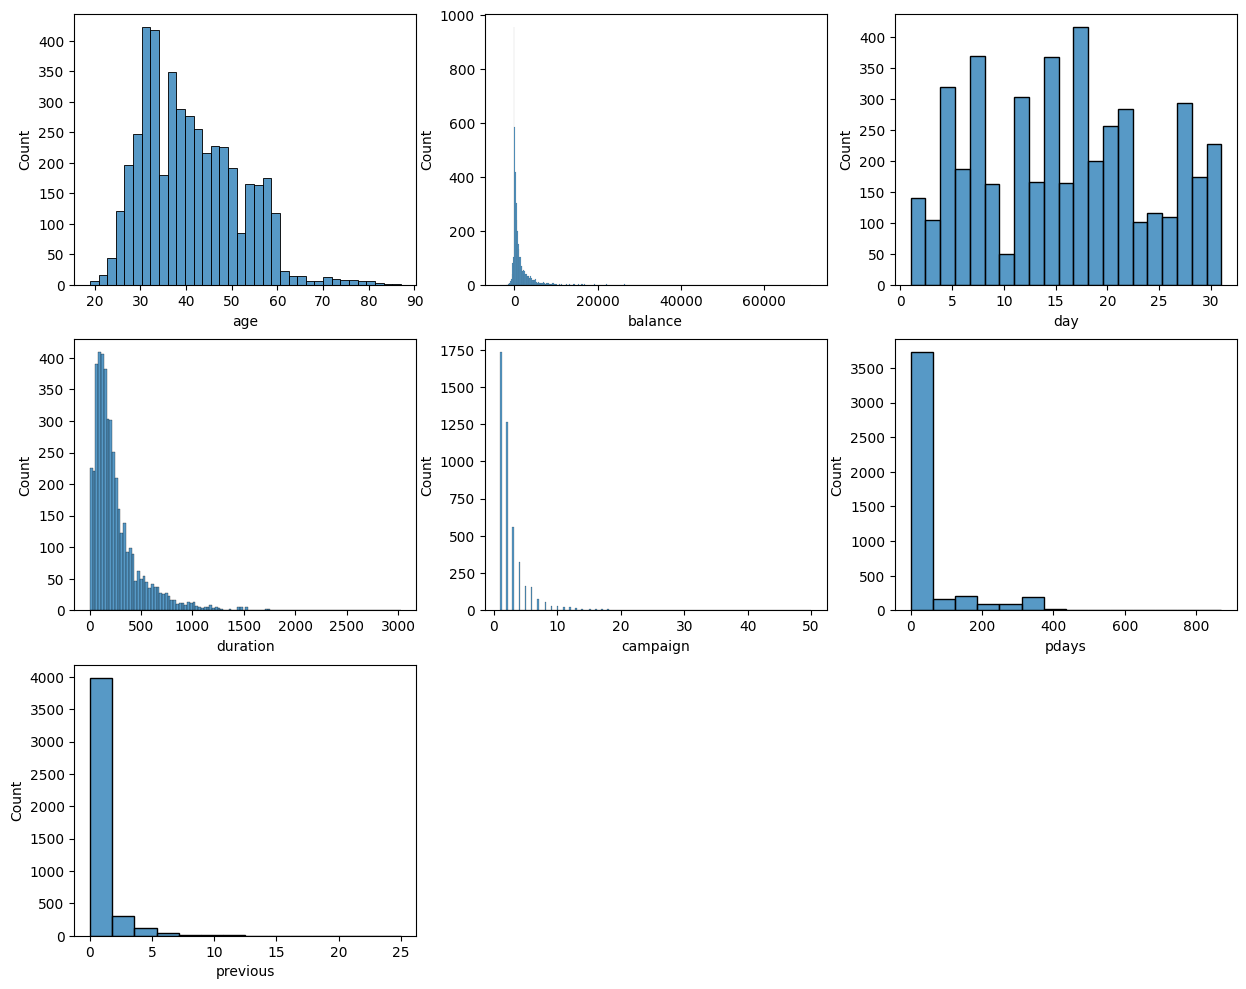

In [20]:
# Visualize numerical variables
plt.figure(figsize=(15,50), facecolor='white')
plot =1
for col in numerical_vars:
    ax = plt.subplot(12,3,plot)
    sns.histplot(x=col,data=df)
    plt.xlabel(col)
    plot+=1
plt.show()


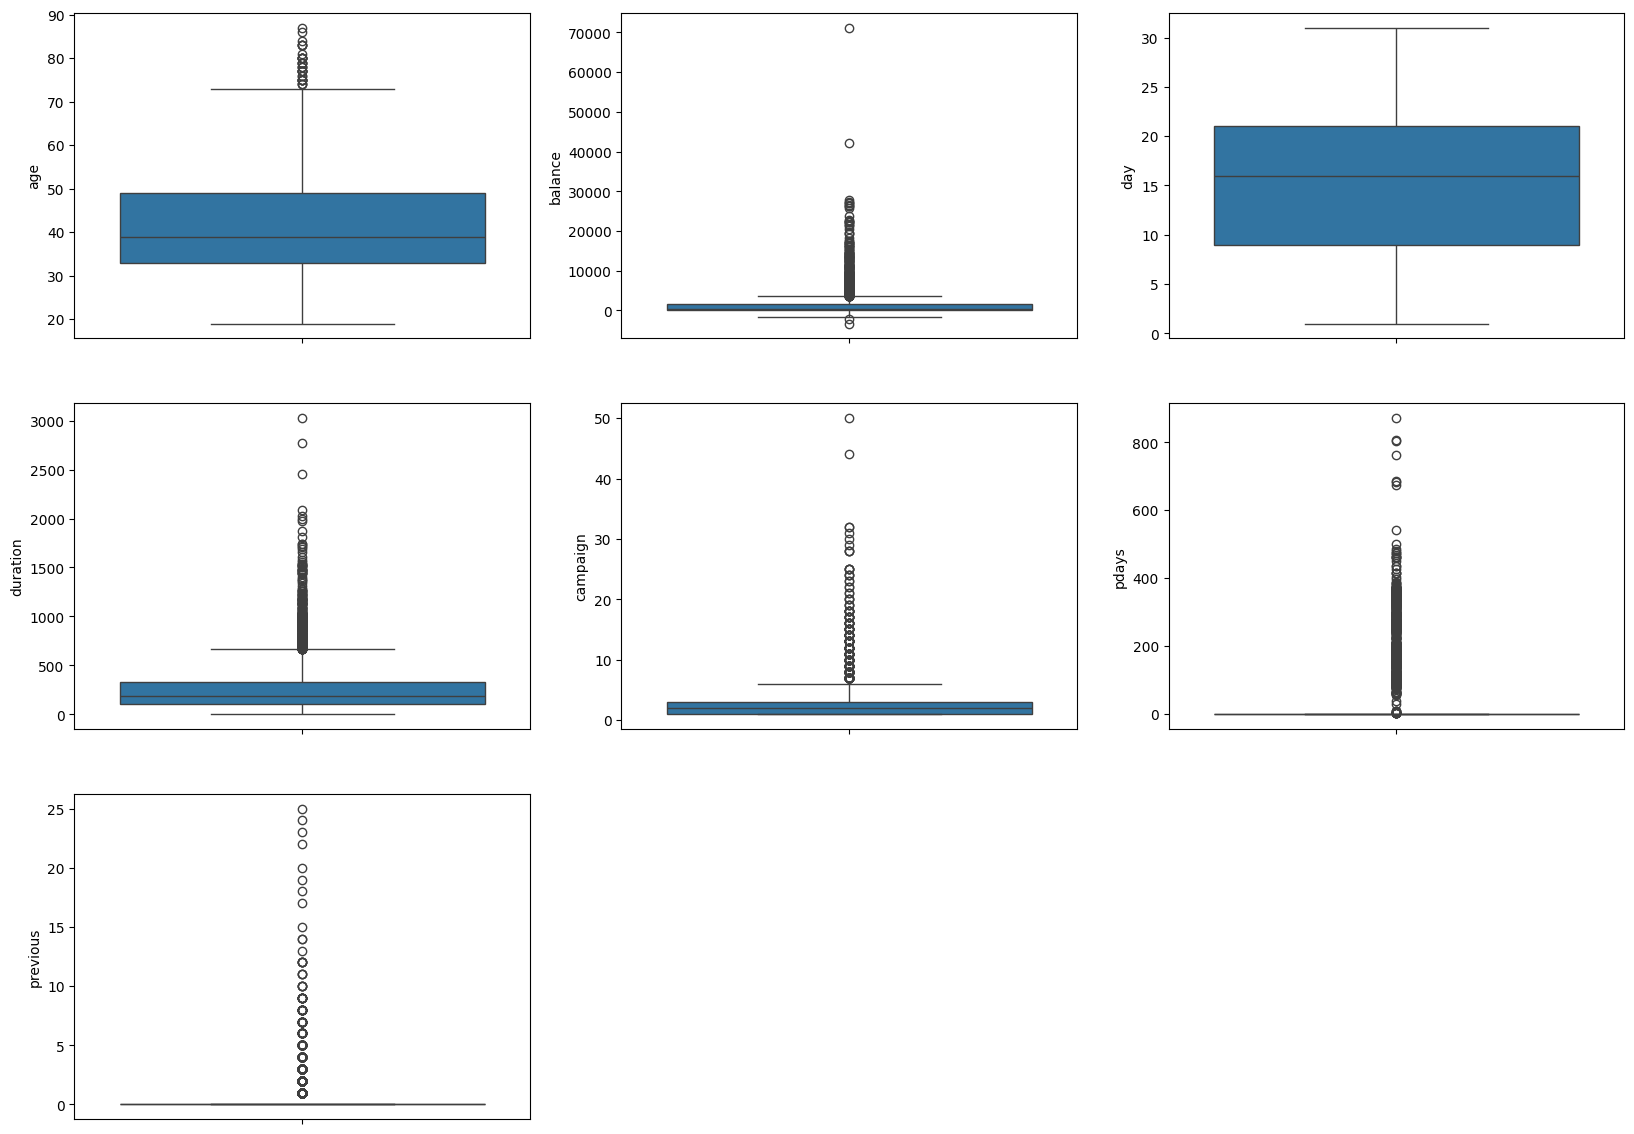

In [21]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plot = 1
for col in numerical_vars:
    ax = plt.subplot(12,3,plot)
    sns.boxplot(df[col])
    plot+=1
plt.show()

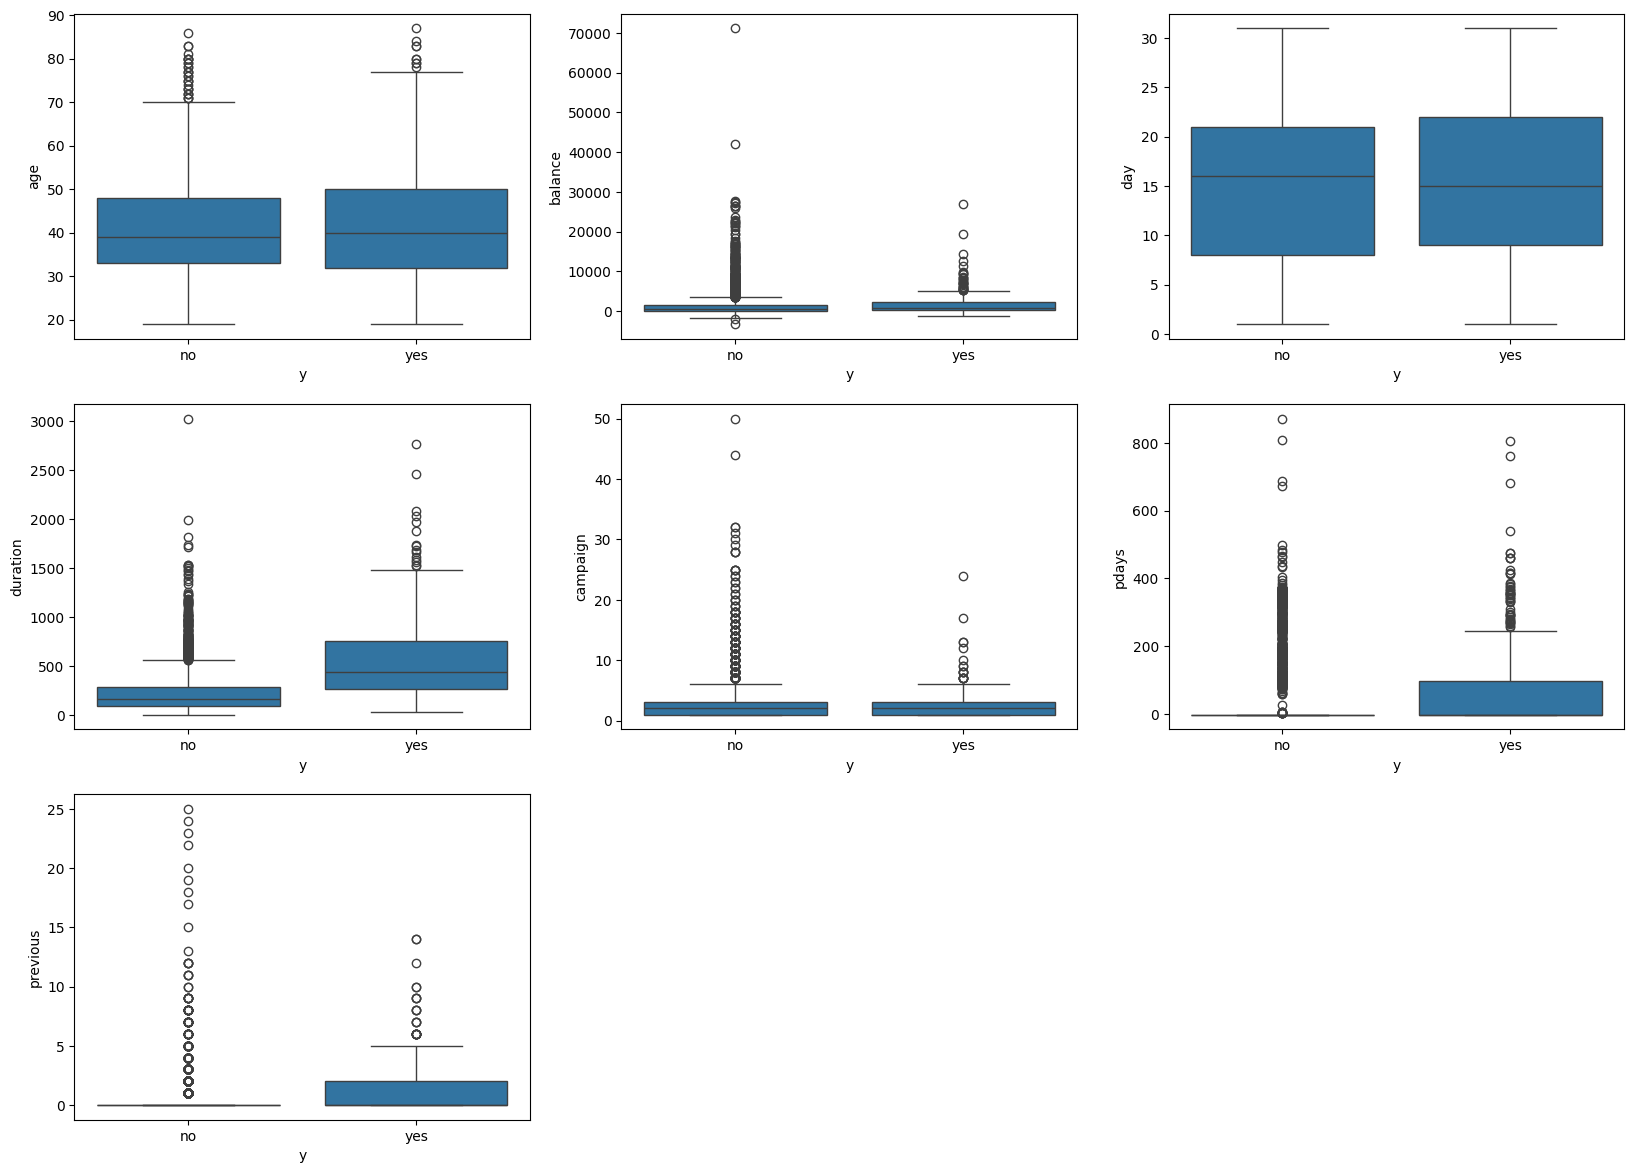

In [22]:
# Visualize numerical variables against the target variable 'y'
plt.figure(figsize=(20,60), facecolor='white')
plot = 1
for col in numerical_vars:
    ax = plt.subplot(12, 3, plot)
    sns.boxplot(x='y', y=col, data=df)
    plt.xlabel('y')
    plt.ylabel(col)
    plot += 1
plt.show()


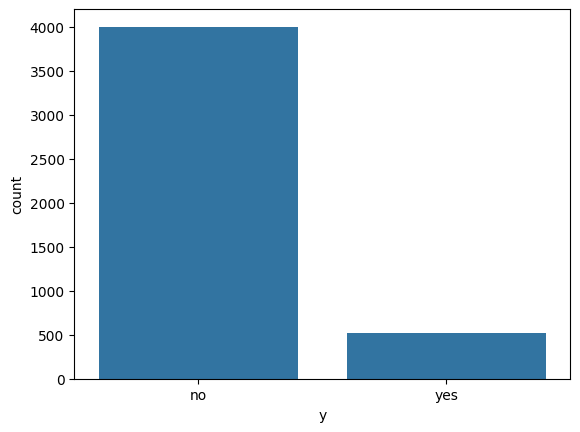

In [23]:
# Visualize the distribution of the target variable 'y'
sns.countplot(x='y',data=df)
plt.show()

In [24]:
# Count the number of occurrences for each category in the target variable 'y'
df['y'].groupby(df['y']).count()

,y
y,
no,4000
yes,521


# Feature Engineering

**Encode Categorical Variables**

In [25]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [26]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


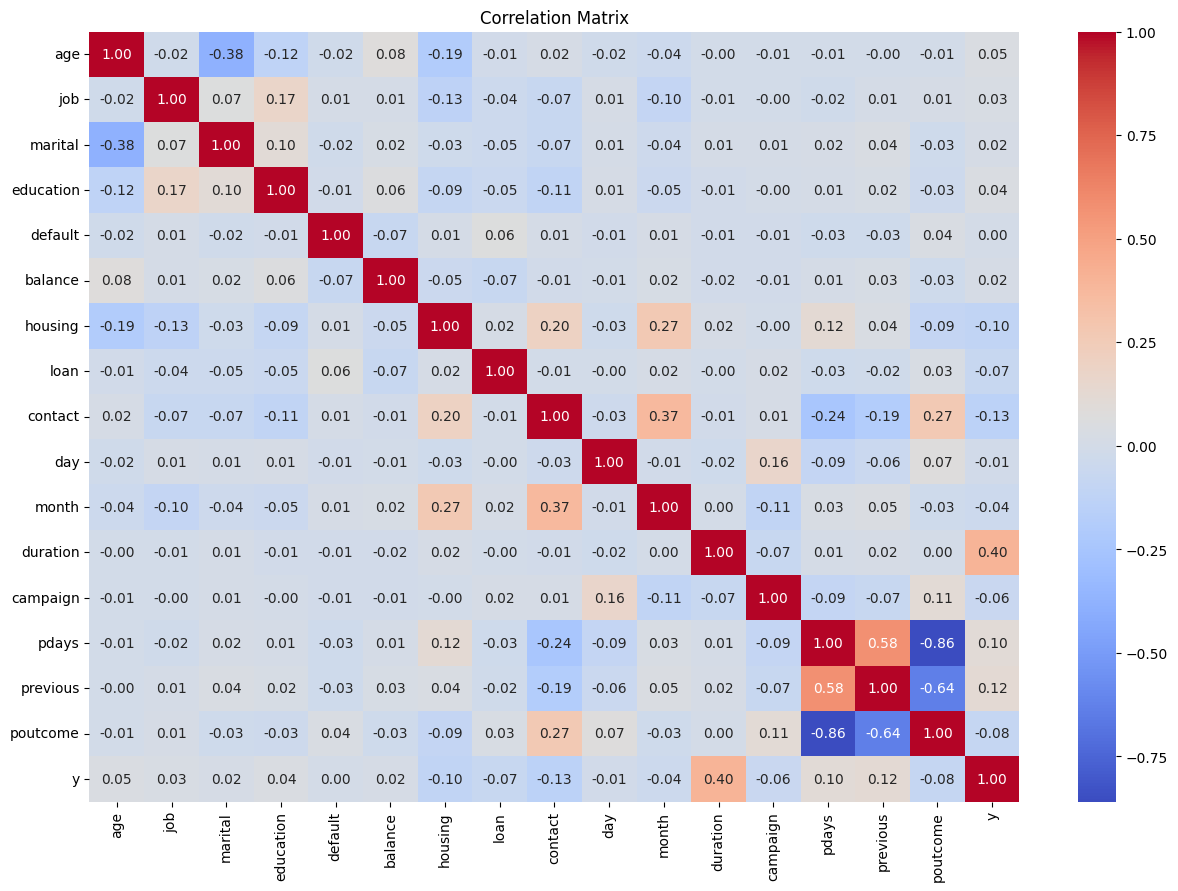

In [27]:
# Correlation Matrix
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Model Training

In [28]:
# Split the data into training and testing sets
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
len(X_train)

3164

In [30]:
len(X_test)

1357

In [31]:
# Train a Decision Tree Classifier
dtl = DecisionTreeClassifier(random_state=42)
dtl.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
# Make predictions on the test set
y_pred = dtl.predict(X_test)

# Model Evaluation

In [33]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[1110   95]
 [  93   59]]


In [34]:
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))



Accuracy Score:
0.8614591009579956


In [35]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1205
           1       0.38      0.39      0.39       152

    accuracy                           0.86      1357
   macro avg       0.65      0.65      0.65      1357
weighted avg       0.86      0.86      0.86      1357



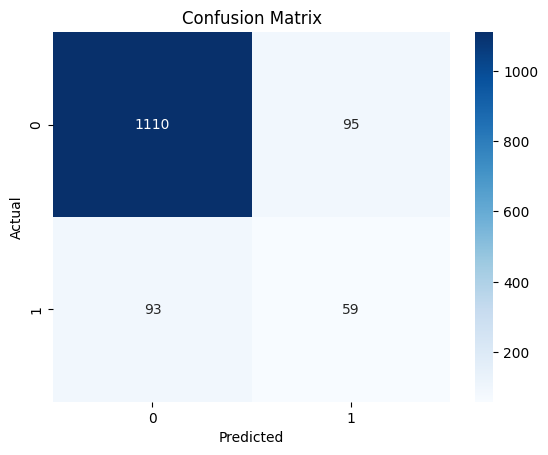

In [36]:
# Visualize the confusion matrix using a heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


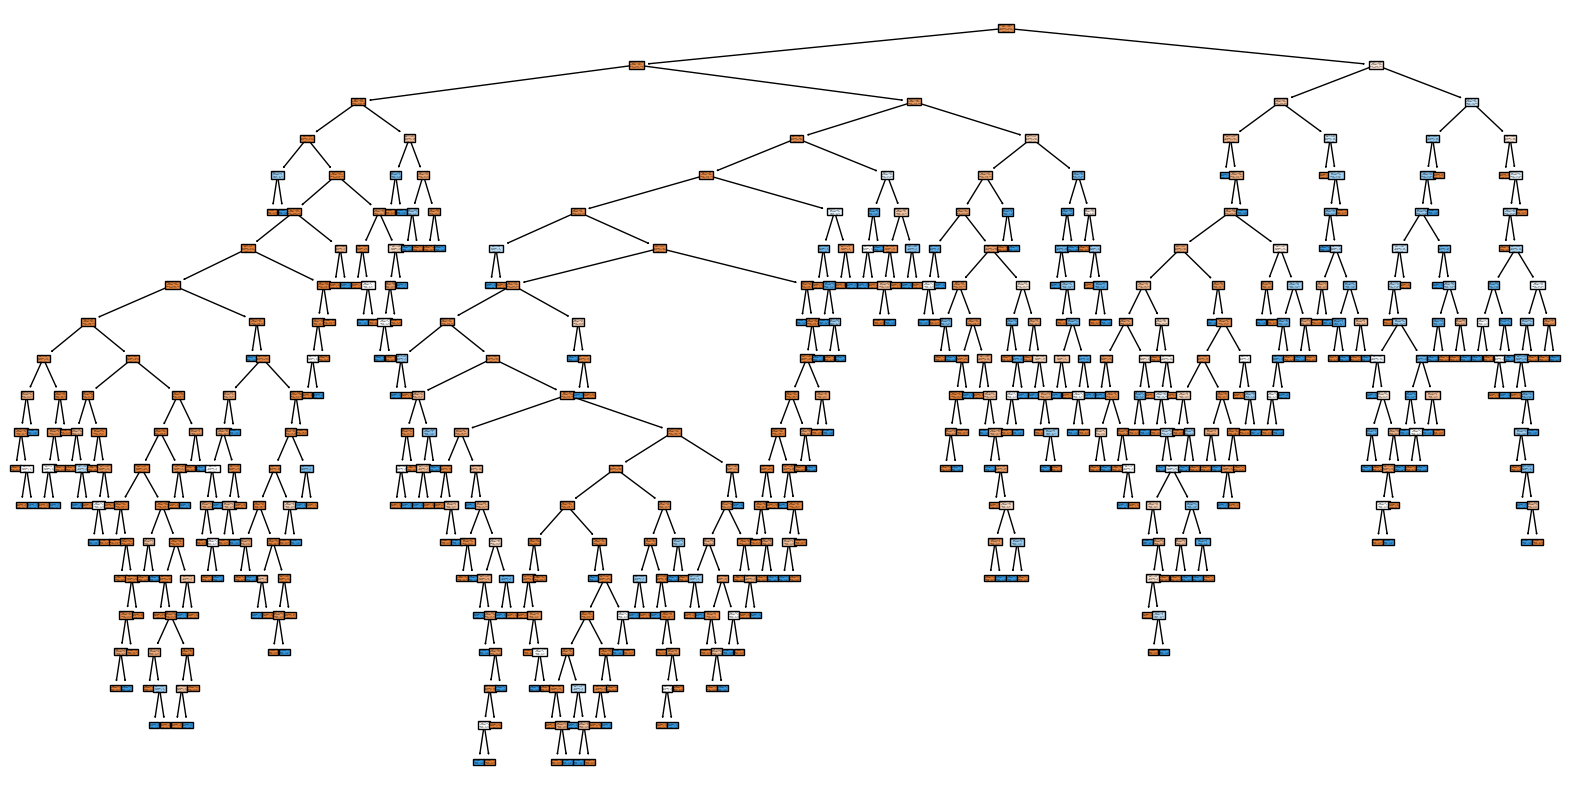

In [37]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dtl, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()
